In [1]:
# Imports, always include this at the beginning

# No science without NumPy
import numpy as np

# Matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib notebook

# for pretty printing the model
from IPython.display import display, Markdown

# Of course we want Glotaran
import glotaran as gta

In [2]:
# First we define our model specification. See the documentation for details how to do so.
model_spec = '''
type: kinetic

parameters:
    - [kinetic, 101e-2]
    - irf:
      - [center, 0.5]
      - [width, 1]


compartments: [s1]

megacomplexes:
    - label: mc1
      k_matrices: [k1]

k_matrices:
  - label: "k1"
    matrix: {
      '("s1","s1")': kinetic,
}       

irf: 
  - label: irf1
    type: gaussian
    center: irf.center
    width: irf.width 
      
datasets: 
  - label: dataset-noirf
    type: spectral
    megacomplexes: [mc1]
 
  - label: dataset-irf
    type: spectral
    megacomplexes: [mc1]
    irf: irf1
'''

# Then we can create our model
model = gta.parse(model_spec)
display(Markdown(str(model)))

# Model

_Type_: Kinetic

## Parameter
  * __kinetic__: _Value_: 1.01, _Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
  * __irf__:
    * __center__: _Value_: 0.5, _Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
    * __width__: _Value_: 1.0, _Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True


## Datasets

### _dataset-noirf_

* _Dataset Scaling_: None
* _Initial Concentration_: None
* _Megacomplexes_: ['mc1']
* _Megacomplex Scalings_: None

### _dataset-irf_

* _Dataset Scaling_: None
* _Initial Concentration_: None
* _Megacomplexes_: ['mc1']
* _Megacomplex Scalings_: None
* _Irf_: irf1

## Compartments

* s1

## Megacomplexes

### _mc1_
* _K-Matrices_: ['k1']


## K-Matrices

### _k1_

compartment |    __s1__ |
------------|-----------|
     __s1__ |   kinetic |

## IRFs

### _irf1_
* _Type_: 'Gaussian'
* _Center_: ['irf.center']
* _Width_: ['irf.width']
* _Center Dispersion_: []
* _Width Dispersion_: []
* _Scale_: []
* _Nomalize_: True



In [3]:
# Now let us define some simulation parameters
sim_params = {
    "kinetic": 101e-3,
}

# We also need a spectral, a time axis

spectral_axis = np.array([0]) # Only one spectral  point for this simple example. The value is meaningless since don't have defined any spectral shape
time_axis = np.arange(-10, 100, 1.5)

# Now we can simulate the data
model.simulate('dataset-noirf', {"spectral": spectral_axis, "time": time_axis}, parameter=sim_params, noise=True, noise_std_dev=0.05)
model.simulate('dataset-irf', {"spectral": spectral_axis, "time": time_axis}, parameter=sim_params, noise=True, noise_std_dev=0.05)

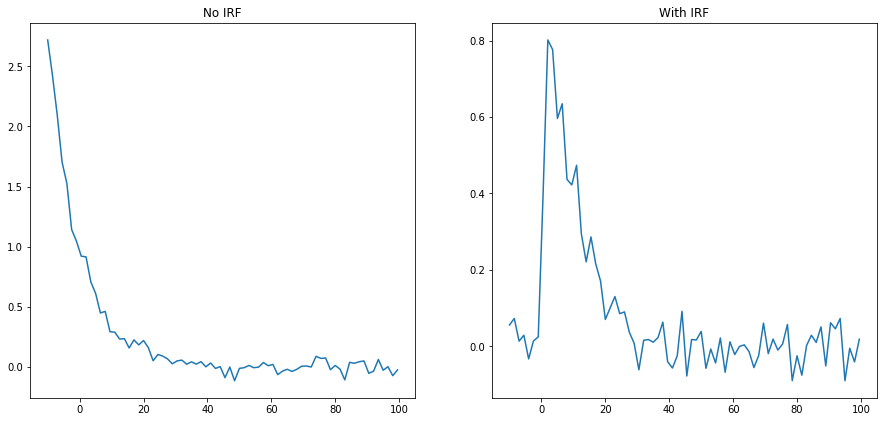

In [4]:
# Lets plot the data

# First we retrieve the datasets and the corresponding data.
dataset_noirf = model.get_dataset('dataset-noirf')
data_noirf = dataset_noirf.get()

dataset_irf = model.get_dataset('dataset-irf')
data_irf = dataset_irf.get()

# no we can plot the data

plt.figure(figsize=(40, 40))

plt.subplot(5, 5, 1)
plt.title('No IRF')
plt.plot(time_axis, data_noirf[0, :])

plt.subplot(5, 5, 2)
plt.title('With IRF')
plt.plot(time_axis, data_irf[0, :])

In [5]:
# Now we fit data. Notice that Glotaran is fitting both datasets simultanousely to find the parameters which explain BOTH datasets.
result = model.fit()
display(Markdown(str(result)))

   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.0589e+01                                    3.06e+00    
       1              3         8.7978e+00      1.79e+00       3.77e-01       7.17e+00    
       2              5         7.0371e+00      1.76e+00       1.88e-01       1.21e+01    
       3              6         1.0477e+00      5.99e+00       3.77e-01       6.07e+01    
       4              7         1.9603e-01      8.52e-01       2.31e-01       8.69e+00    
       5              8         1.6543e-01      3.06e-02       1.05e-01       2.19e-01    
       6              9         1.6541e-01      2.32e-05       3.96e-03       1.65e-03    
       7             10         1.6541e-01      1.76e-09       1.23e-04       1.05e-05    
       8             11         1.6541e-01      3.26e-12       8.16e-06       1.39e-07    
`ftol` termination condition is satisfied.
Function evaluations 11, initial cost 1.0589e+0

# Fitresult

Optimization Result            |            |
-------------------------------|------------|
 Number of residual evaluation |         12 |
           Number of variables |          3 |
          Number of datapoints |        148 |
            Negrees of freedom |        145 |
                    Chi Square |   0.330822 |
            Reduced Chi Square |   0.002282 |

## Best Fit Parameter

  * __kinetic__: _Value_: 0.10254963533521223, _Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
  * __irf__:
    * __center__: _Value_: 0.712683192972111, _Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True
    * __width__: _Value_: 0.8868040515995512, _Min_: -inf, _Max_: inf, _Vary_: True, _Fit_: True



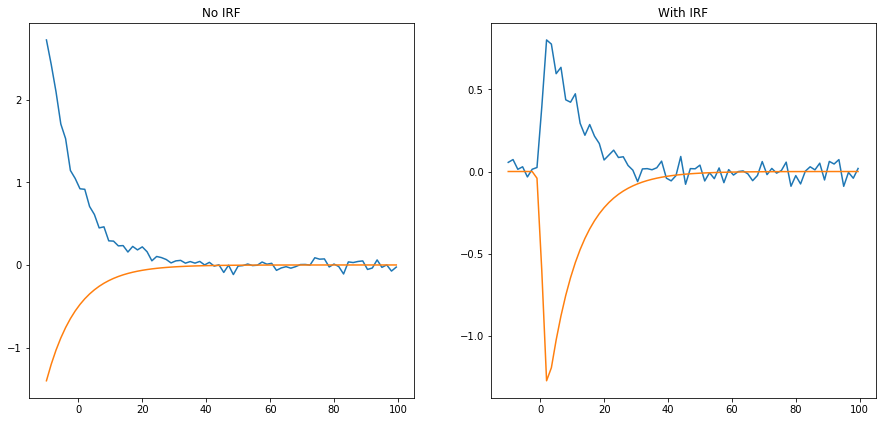

In [6]:
# Lets plot the fitted data

# First we retrieve the fitted datasets and the corresponding data.
fitted_dataset_noirf = result.fitted_data('dataset-noirf')
fitted_data_noirf = fitted_dataset_noirf.get()

fitted_dataset_irf = result.fitted_data('dataset-irf')
fitted_data_irf = fitted_dataset_irf.get()

# no we can plot the data

plt.figure(figsize=(40, 40))

plt.subplot(5, 5, 1)
plt.title('No IRF')
plt.plot(time_axis, data_noirf[0, :])
plt.plot(time_axis, fitted_data_noirf[0, :])

plt.subplot(5, 5, 2)
plt.title('With IRF')
plt.plot(time_axis, data_irf[0, :])
plt.plot(time_axis, fitted_data_irf[0, :])